# LAB 1 - PCA

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# Load arrest data
data_usarrests = pd.read_csv('usa_arrest.csv')
print(data_usarrests)

                Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        6

In [6]:
# Print states names
states = data_usarrests.index.get_values()
print(states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [7]:
# Print mean value of each feature
data_usarrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
# Print variance value of each feature
data_usarrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [9]:
# Print std
data_usarrests.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [10]:
# Create arrays of features
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
x = data_usarrests.loc[:, features].values

# Standardize the features
x = StandardScaler().fit_transform(x)

print('shape of x:' + str(np.shape(x)))
print(x)

shape of x:(50, 4)
[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.8145213

In [49]:
# Compute PCA
pca = PCA()
pca_data = pca.fit_transform(x)

# Print PCA loadings
columns_pca = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
pca_loadings = (pca.components_).T
pca_loadings_df = pd.DataFrame(pca_loadings, index=features, columns=columns_pca)
print(pca_loadings_df)

              PCA1      PCA2      PCA3      PCA4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024


In [51]:
# Print principal component score vectors
pca_score_vectors = pca_data
pca_score_vectors_df = pd.DataFrame(pca_score_vectors, index=states, columns=columns_pca)
print(pca_score_vectors_df)

                    PCA1      PCA2      PCA3      PCA4
Alabama        -0.985566 -1.133392  0.444269 -0.156267
Alaska         -1.950138 -1.073213 -2.040003  0.438583
Arizona        -1.763164  0.745957 -0.054781  0.834653
Arkansas        0.141420 -1.119797 -0.114574  0.182811
California     -2.523980  1.542934 -0.598557  0.341996
Colorado       -1.514563  0.987555 -1.095007 -0.001465
Connecticut     1.358647  1.088928  0.643258  0.118469
Delaware       -0.047709  0.325359  0.718633  0.881978
Florida        -3.013042 -0.039229  0.576829  0.096285
Georgia        -1.639283 -1.278942  0.342460 -1.076797
Hawaii          0.912657  1.570460 -0.050782 -0.902807
Idaho           1.639800 -0.210973 -0.259801  0.499104
Illinois       -1.378911  0.681841  0.677496  0.122021
Indiana         0.505461  0.151563 -0.228055 -0.424666
Iowa            2.253646  0.104054 -0.164564 -0.017556
Kansas          0.796881  0.270165 -0.025553 -0.206496
Kentucky        0.750859 -0.958440  0.028369 -0.670557
Louisiana 

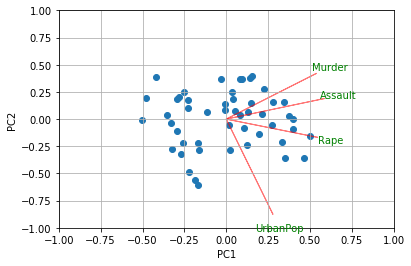

In [59]:
# Plot the first two PCA components

y = features

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "VAR"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Call the function. Use only the 2 PCs.
myplot(pca_score_vectors[:,0:2],pca_loadings[:,0:2], labels=features)
plt.show()

## CREDITS: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

In [63]:
# Print explained variance by each component
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

variance_df = pd.DataFrame([variance, variance_ratio], index = ['Variance', 'Variance_ratio'], columns=columns_pca)
print(variance_df)

                    PCA1      PCA2      PCA3      PCA4
Variance        2.530859  1.009964  0.363840  0.176969
Variance_ratio  0.620060  0.247441  0.089141  0.043358


Text(0.5,0,'Component')

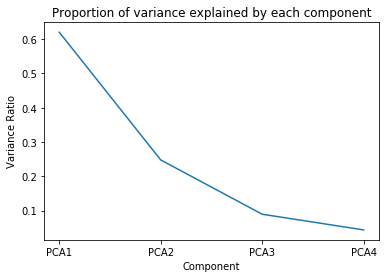

In [70]:
# Plot variance explained by each component 
plt.plot(variance_df.loc['Variance_ratio'])
plt.title('Proportion of variance explained by each component')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

Text(0.5,0,'Component')

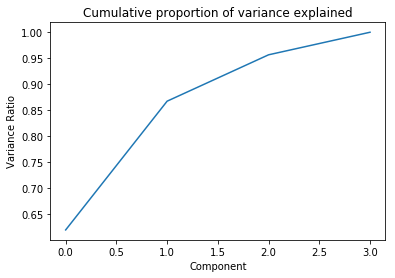

In [75]:
# Plot cumulative sum of variance explained by each component

cumulative_values = np.cumsum(variance_ratio)

plt.plot(cumulative_values)
plt.title('Cumulative proportion of variance explained')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

In [13]:
import statsmodels.multivariate.pca as sm_pca

In [29]:
# Compute PCA
pc = sm_pca.PCA(x, normalize=False)

# Print loadings 
columns_pca = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
pca_loadings_sm = pd.DataFrame(pc.loadings, index=features, columns=columns_pca)
print(pca_loadings_sm)

              PCA1      PCA2      PCA3      PCA4
Murder   -0.535899  0.418181 -0.341233  0.649228
Assault  -0.583184  0.187986 -0.268148 -0.743407
UrbanPop -0.278191 -0.872806 -0.378016  0.133878
Rape     -0.543432 -0.167319  0.817778  0.089024


In [25]:
# Print scores 
pca_score_sm = pd.DataFrame(pc.scores, index=states, columns=columns_pca)
print(pca_score_sm)

                    PCA1      PCA2      PCA3      PCA4
Alabama        -0.985566  1.133392 -0.444269  0.156267
Alaska         -1.950138  1.073213  2.040003 -0.438583
Arizona        -1.763164 -0.745957  0.054781 -0.834653
Arkansas        0.141420  1.119797  0.114574 -0.182811
California     -2.523980 -1.542934  0.598557 -0.341996
Colorado       -1.514563 -0.987555  1.095007  0.001465
Connecticut     1.358647 -1.088928 -0.643258 -0.118469
Delaware       -0.047709 -0.325359 -0.718633 -0.881978
Florida        -3.013042  0.039229 -0.576829 -0.096285
Georgia        -1.639283  1.278942 -0.342460  1.076797
Hawaii          0.912657 -1.570460  0.050782  0.902807
Idaho           1.639800  0.210973  0.259801 -0.499104
Illinois       -1.378911 -0.681841 -0.677496 -0.122021
Indiana         0.505461 -0.151563  0.228055  0.424666
Iowa            2.253646 -0.104054  0.164564  0.017556
Kansas          0.796881 -0.270165  0.025553  0.206496
Kentucky        0.750859  0.958440 -0.028369  0.670557
Louisiana 

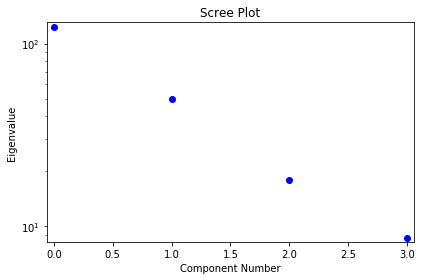

In [31]:
pc.plot_scree()